Возьму датасет, содержащий описание цветков ириса и их 
классификацию по сортам (Setosa, Versicolour, Virginica из в sklearn.datasets.load_iris.

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()

Разделю данные на обучающую и тестирующую выборку в соотношение 70%/30%

In [78]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.7)

С помощью метода LDA реализую классификацию сортов ириса на основании признаков датасета. Затем по метрикам из первого задания оценю эффективность классификатора.

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

pred = lda.predict(x_test)
print("Процент правильных ответов - ", round(accuracy_score(y_test, pred)*100, 2), "%")

Процент правильных ответов -  100.0 %


Процент правильных ответов достаточно высокий. Теперь посмотрим, матрицу ошибок.

In [80]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, pred)
print(f'Первый вид ириса правильно определен - {matrix[0][0]} раз из {sum(matrix[0])}. В процентах - {round(matrix[0][0]/sum(matrix[0])*100, 2)} %')
print(f'Второй вид ириса правильно определен - {matrix[1][1]} раз из {sum(matrix[1])}. В процентах - {round(matrix[1][1]/sum(matrix[1])*100, 2)} %')
print(f'Третий вид ириса правильно определен - {matrix[2][2]} раз из {sum(matrix[2])}. В процентах - {round(matrix[2][2]/sum(matrix[2])*100, 2)} %')

Первый вид ириса правильно определен - 15 раз из 15. В процентах - 100.0 %
Второй вид ириса правильно определен - 16 раз из 16. В процентах - 100.0 %
Третий вид ириса правильно определен - 14 раз из 14. В процентах - 100.0 %


Как можно видеть, классификатор выдал очень хорошие результаты. И при каждом обучении доля правильных ответов в любом классе выше 90%

Сравню метод LDA из sklearn.discriminant_analysis и реализацию из Sem3.ipynb.
Для этого скопирую сюда реализацию из sem3.ipynb

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def LDA_dimensionality(X, y, k):
    '''
    X - набор данных, y - метка, k - целевой размер
    '''
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs

 Проведу обучение и классификацию

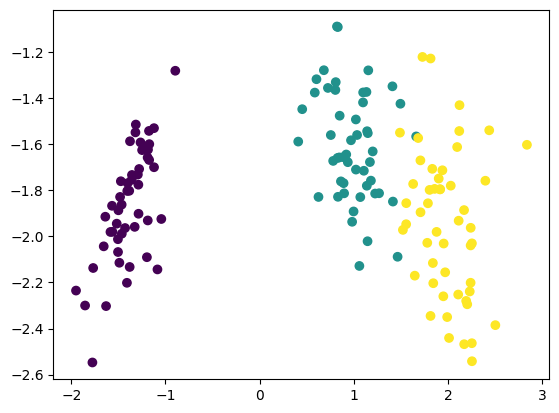

In [82]:
import numpy as np
X = iris.data
y = iris.target

W = LDA_dimensionality(X, y, 2)
X_new = np.dot((X), W)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y)


plt.show()

Рассматривая график результата разделения цветков по классам графически(можно визуально представить области, которым пренадлежит определенный цветок), можно сделать вывод, что самописный метод LDA отработал хорошо. Также как и библиотечный он полностью правильно выделил первый класс(фиолетовый цвет) и при проведение визуальной границы, видно что граница между вторым (зеленым) и третьим (желтым) классами нечеткая, в результате чего классификатор ошибается в 1-2 записях цветка второго класса и 1-2 записях цветка третьего класса.
Вообщем, из результатов работы обоих алгоритмов можно сделать вывод, что реализация библиотеки sklearn и реализация из файла Sem3.ipynb выдают примерно одинаковый результат с небольшой погрешностью.

Рассмотрю документацию метода LDA и изменю параметры классификатора таким образом, чтобы алгоритм работал эффективнее

In [83]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr')
lda.fit(x_train, y_train)

pred = lda.predict(x_test)
print("Процент правильных ответов - ", round(accuracy_score(y_test, pred)*100, 2), "%")

Процент правильных ответов -  100.0 %


Больше всего на конечном результате сказывается параметр классификатора solver, так как он определяет какой метод решения будет использоваться. В данной задаче он мало влияет на конечный результат в виду небольшого размера датасета (у нас вприницпе довольно высокий уровень обучения + ошибка в 1 запись из 45 ведет к большому изменению процента правильных ответов, примерно в 2 с лишним процента)